## Question 1

Entities to investigate

Mar de la Vida OJSC

979893388

Oceanfront Oasis Inc Carrie


8327
Use visual analytics to dynamically display and explore context around the suspected entities listed above. What did you learn about each one? Can you connect them to illegal fishing? Provide evidence for or against the case that each entity is involved in illegal fishing and use visual analytics to express confidence in your conclusions.

In [30]:
import pandas as pd
import json

# Specify the encoding parameter when opening the file
with open('../dataset/MC1.json', encoding='utf-8') as f:
    data = json.load(f)

# Convert JSON to DataFrame
df = pd.json_normalize(data)

In [31]:
df.head(1)

,directed,multigraph,nodes,links
0,True,True,"[{'type': 'company', 'dataset': 'MC1', 'countr...","[{'type': 'ownership', 'weight': 0.90013963, '..."


In [32]:
nodes_df = pd.json_normalize(df['nodes'])
nodes_df = nodes_df
print(nodes_df)

                                                0     \
0  {'type': 'company', 'dataset': 'MC1', 'country...   

                                                1     \
0  {'type': 'organization', 'dataset': 'MC1', 'id...   

                                                2     \
0  {'type': 'organization', 'dataset': 'MC1', 'id...   

                                                3     \
0  {'type': 'organization', 'dataset': 'MC1', 'id...   

                                                4     \
0  {'type': 'organization', 'dataset': 'MC1', 'id...   

                                                5     \
0  {'type': 'organization', 'dataset': 'MC1', 'id...   

                                                6     \
0  {'type': 'organization', 'dataset': 'MC1', 'id...   

                                                7     \
0  {'type': 'company', 'dataset': 'MC1', 'country...   

                                                8     \
0  {'type': 'organization', 'dataset': '

In [15]:
print(nodes_df["type"])

company


In [19]:
nodes_df = pd.json_normalize(df['nodes'])
nodes_df = nodes_df[6][0]
print(nodes_df)

{'type': 'organization', 'dataset': 'MC1', 'id': 185040354}


In [54]:
nodes_df = pd.json_normalize(df['nodes'])

df_new_nodes = pd.DataFrame(["id", "type", "country"])


for count in range(nodes_df.shape[1]):
    node_dict = nodes_df[count][0]  # Assuming the dictionaries are in the first row of each column
    type_value = node_dict.get('type', 'NaN')
    country_value = node_dict.get('country', 'NaN')
    id_value = node_dict.get('id', 'NaN')

     # Append the values to df_new_nodes
    df_new_nodes = df_new_nodes._append({'id': id_value, 'type': type_value, 'country': country_value}, ignore_index=True)
    
    print(f"Column {count}: Type = {country_value}")


Column 0: Type = Nalakond
Column 1: Type = N/A
Column 2: Type = N/A
Column 3: Type = N/A
Column 4: Type = N/A
Column 5: Type = N/A
Column 6: Type = N/A
Column 7: Type = Rio Isla
Column 8: Type = N/A
Column 9: Type = N/A
Column 10: Type = N/A
Column 11: Type = N/A
Column 12: Type = N/A
Column 13: Type = Country_271835
Column 14: Type = Country_271835
Column 15: Type = N/A
Column 16: Type = N/A
Column 17: Type = N/A
Column 18: Type = N/A
Column 19: Type = N/A
Column 20: Type = N/A
Column 21: Type = Country_789455
Column 22: Type = N/A
Column 23: Type = N/A
Column 24: Type = Country_271835
Column 25: Type = N/A
Column 26: Type = N/A
Column 27: Type = N/A
Column 28: Type = N/A
Column 29: Type = N/A
Column 30: Type = N/A
Column 31: Type = Osterivaria
Column 32: Type = Osterivaria
Column 33: Type = Country_271835
Column 34: Type = N/A
Column 35: Type = Country_712875
Column 36: Type = N/A
Column 37: Type = Country_271835
Column 38: Type = N/A
Column 39: Type = Country_271835
Column 40: Type 

In [69]:



filtered_df = df_new_nodes[df_new_nodes['country'] != ('N/A' and 'NaN')]
filtered_df.head()


,0,id,type,country
0,id,NaN,NaN,NaN
1,type,NaN,NaN,NaN
2,country,NaN,NaN,NaN
3,NaN,Spanish Shrimp Carriers,company,Nalakond
4,NaN,12744,organization,N/A


In [60]:
df_new_nodes.describe()

,0,id,type,country
count,3,3428,3428,3428
unique,3,3428,9,118
top,id,Spanish Shrimp Carriers,person,N/A
freq,1,1,1022,2316


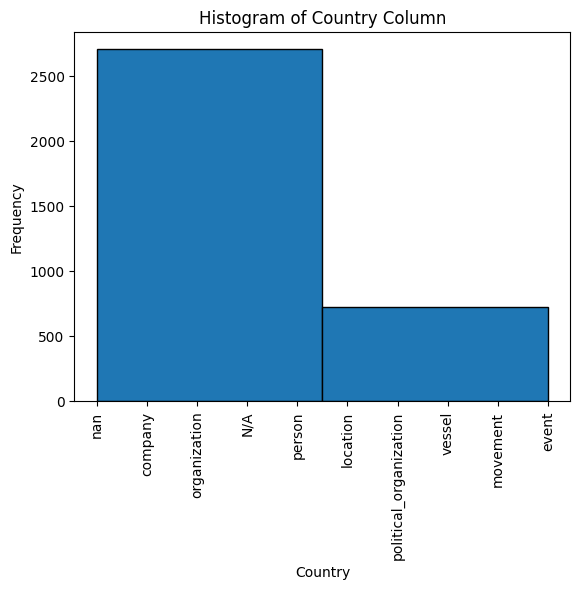

In [75]:
import matplotlib.pyplot as plt



df_new_nodes['country'] = df_new_nodes['country'].astype(str).replace('N/A', 'Unknown')

filtered_df = df_new_nodes[df_new_nodes['country'] != ('N/A' and 'NaN')]

# Plot the histogram
plt.hist(df_new_nodes['type'].astype(str), bins=2, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Histogram of Country Column')
# Rotate x-axis labels vertically for better visibility
plt.xticks(rotation='vertical')
plt.show()